In [6]:
%matplotlib inline

import random
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

import torch
from torchvision import datasets, transforms

Number of MNIST training examples: 60000
Number of MNIST test examples: 10000
Defualt image size: torch.Size([1, 28, 28])
The corresponding label is: 8


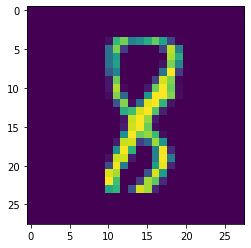

In [40]:
# Data descrption and loading

# we use MNIST datasets for demonstrations here
# you can also visit http://yann.lecun.com/exdb/mnist/
mnist_train = datasets.MNIST(root="./datasets", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = datasets.MNIST(root="./datasets", train=False, transform=transforms.ToTensor(), download=True)

# total # of images in training and test sets
print(f"Number of MNIST training examples: {len(mnist_train)}")
print(f"Number of MNIST test examples: {len(mnist_test)}")

# image size
image, label = random.choice(mnist_train)
print(f"Defualt image size: {image.shape}")

# show a random image
image = image.reshape(image.shape[1:])
plt.imshow(image)
print(f"The corresponding label is: {label}")

In [72]:
# Model and training

# create minibatch
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=100, shuffle=False)

# initialize weight W and bias b
# each input vector has length: x.shape[-1]
# total 10 classes: digits 0 to 9
W = torch.randn(x.shape[-1], 10)/np.sqrt(x.shape[-1])
b = torch.zeros(10)

# this tells PyTorch to track the gradients for these variables and all other dependent variables
W.requires_grad_()
b.requires_grad_()

# define the optimizer
# lr sets the learning rate
optimizer = torch.optim.SGD([W,b], lr=0.1)

for images, labels in tqdm(train_loader):
    # PyToch accumulates the gradients so we need to set it to zero
    optimizer.zero_grad()
    
    # Forward pass
    x = images.flatten(1) # flatten each image to a vector
    y = torch.matmul(x, W) + b # apply linear transfomation
    loss = torch.nn.functional.cross_entropy(y, labels) # compute loss

    # Backward pass
    loss.backward() # compute the gradient
    optimizer.step() # update the variables with their gradients

In [77]:
# Tests

correct = 0
with torch.no_grad(): # we don't compute grad in tests
    for images, labels in tqdm(test_loader):
        # Forward pass
        x = images.flatten(1)
        y = torch.matmul(x, W) + b
        # Make prediction
        predictions = torch.argmax(y, dim=1)
        correct += torch.sum((predictions == labels).int())

print(f'Test accuracy: {correct/len(mnist_test)}')
# The accuracy is not bad for such a simple model


Test accuracy: 0.9028000235557556


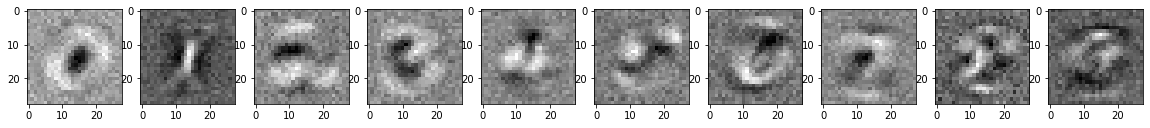

In [84]:
# Weights

fig, ax = plt.subplots(1, 10, figsize=(20, 2))

for digit in range(10):
    ax[digit].imshow(W[:,digit].detach().view(28, 28), cmap='gray')